In [1]:
#!/usr/bin/env python3
import numpy as np
import glob

data_directory = "./vis_project_data/"

# Default weights; used if not set
default_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

# Types of sessions/files:
session_types = ["cog", "so"]
whatdoors = ["indoor", "outdoor"]
whichs = ["base", "inter"]

# Combine to single itteratable list
combined_scenarios = [
    (ses_type, whatdoor, which)
    for ses_type in session_types
    for whatdoor in whatdoors
    for which in whichs
]

################################################################################


def combined_score(filename, weights):
    """Calculates the 'score' for a single session/file.
    Assumes total session duration is 360s, otherwise returns 'nan'.
    This could be modified simply to also return other details of the session."""
    with open(filename, "r") as file:
        score = 0.0
        total_duration = 0.0
        t_end_prev = 0.0
        for count, line in enumerate(file.readlines()):
            # print(count, line)
            data = line.split(",", 4)
            if count == 0:
                continue
            if line[0] == "*":
                break

            t_catagory = int(data[0])
            t_beg = int(data[1])
            t_end = int(data[2])

            if t_beg != t_end_prev:
                print("Error, missing time stamp?")
            t_end_prev = t_end

            assert t_end >= t_beg
            if count == 1:
                assert t_beg == 0

            duration = float(t_end - t_beg)
            total_duration += duration
            score += weights[t_catagory - 1] * duration
        return score / total_duration
        return score if np.abs(total_duration - 1.0) < 1.0e-5 else np.nan


################################################################################


def print_scores(
    ca, peer, cognitive_weights=default_weights, social_weights=default_weights
):
    """Calculates the scores for given ca/peer pair.
    It simply prints the result to screen - to be useful, you will want
    to actually store this data (e.g., return a struct or array etc.).
    """
    trained = "Trained" if "u" <= peer[0] <= "z" else "Untrained"
    print(ca, peer, f"({trained})")
    for ses_type, whatdoor, which in combined_scenarios:

        weights = cognitive_weights if ses_type == "cog" else social_weights

        # glob creates the list of filenames that match the given pattern
        # '*' is a wildcard
        files = glob.glob(
            data_directory + f"{ses_type}-*-{which}-*-{ca}-{peer}-{whatdoor}.dtx"
        )

        if len(files) == 0:
            continue

        scores = []
        for file in files:
            tmp_score = combined_score(file, weights)
            if not np.isnan(tmp_score):
                scores.append(tmp_score)
        scores = np.array(scores)

        mean = scores.mean()
        sdev = scores.std(ddof=1)  # "corrected" sdev
        sem = sdev / np.sqrt(len(scores))
        # Equiv. to:
        # sdev = scores.std()
        # sem = sdev / np.sqrt(len(scores) - 1)

        # len(scores) is the total number of kept (complete) sessions [for this ca/peer]
        # len(files) is the total number of sessions (files) in data directory
        print(
            f"{ses_type:3} {whatdoor:7} {which:5}: {mean:6.3f} +/- {sem:.3f}  [{len(scores)}/{len(files)}]"
        )


################################################################################
def unique_pairs():
    """Returns list of unique ca/peer pairs"""
    all_files = glob.glob(data_directory + "/*.dtx")
    list = []
    for file in all_files:
        t = file.split("-")
        list.append([t[4], t[5]])

    return np.unique(list, axis=0)


################################################################################

if __name__ == "__main__":

    # Example usage:

    ca_peer_list = unique_pairs()
    print(ca_peer_list)

    print()

    # From the thesis:
    soc_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

    # Match table 5.1 of thesis
    # cog_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

    # Match matlab example:
    cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])

    # Or, for all pairs:
    for ca, peer in ca_peer_list:
        print()
        print_scores(ca, peer, cog_weights, soc_weights)

################################################################################




[['albert' 'lydia']
 ['albert' 'ulrich']
 ['barry' 'mario']
 ['barry' 'viola']
 ['chris' 'nellie']
 ['chris' 'wendy']
 ['dana' 'oscar']
 ['dana' 'xavier']
 ['ellie' 'peter']
 ['ellie' 'yoshi']
 ['ellie' 'zara']]


albert lydia (Untrained)
cog indoor  base :  0.033 +/- 0.027  [4/4]
cog indoor  inter:  0.168 +/- 0.084  [13/13]
cog outdoor base :  0.245 +/- 0.110  [4/4]
cog outdoor inter:  0.347 +/- 0.101  [10/10]
so  indoor  base :  0.097 +/- 0.043  [4/4]
so  indoor  inter:  0.129 +/- 0.034  [13/13]
so  outdoor base :  0.101 +/- 0.089  [4/4]
so  outdoor inter:  0.055 +/- 0.016  [10/10]

albert ulrich (Trained)
cog indoor  base :  0.286 +/- 0.102  [5/5]
cog indoor  inter:  0.709 +/- 0.079  [10/10]
cog outdoor base :  0.382 +/- 0.200  [6/6]
cog outdoor inter:  0.822 +/- 0.099  [7/7]
so  indoor  base :  0.496 +/- 0.208  [5/5]
so  indoor  inter:  1.026 +/- 0.099  [10/10]
so  outdoor base :  0.132 +/- 0.060  [6/6]
so  outdoor inter:  1.069 +/- 0.181  [7/7]

barry mario (Untrained)
cog indoor 

[['albert' 'lydia']
 ['albert' 'ulrich']
 ['barry' 'mario']
 ['barry' 'viola']
 ['chris' 'nellie']
 ['chris' 'wendy']
 ['dana' 'oscar']
 ['dana' 'xavier']
 ['ellie' 'peter']
 ['ellie' 'yoshi']
 ['ellie' 'zara']]


albert lydia (Untrained)
cog indoor  base :  0.033 +/- 0.027  [4/4]
cog indoor  inter:  0.168 +/- 0.084  [13/13]
so  indoor  base :  0.097 +/- 0.043  [4/4]
so  indoor  inter:  0.129 +/- 0.034  [13/13]

albert ulrich (Trained)
cog indoor  base :  0.286 +/- 0.102  [5/5]
cog indoor  inter:  0.709 +/- 0.079  [10/10]
so  indoor  base :  0.496 +/- 0.208  [5/5]
so  indoor  inter:  1.026 +/- 0.099  [10/10]

barry mario (Untrained)
cog indoor  base :  0.490 +/- 0.069  [4/4]
cog indoor  inter:  0.470 +/- 0.107  [12/12]
so  indoor  base :  0.281 +/- 0.070  [4/4]
so  indoor  inter:  0.237 +/- 0.064  [12/12]

barry viola (Trained)
cog indoor  base :  0.591 +/- 0.134  [4/4]
cog indoor  inter:  0.775 +/- 0.128  [12/12]
so  indoor  base :  0.444 +/- 0.049  [4/4]
so  indoor  inter:  0.517 +/-

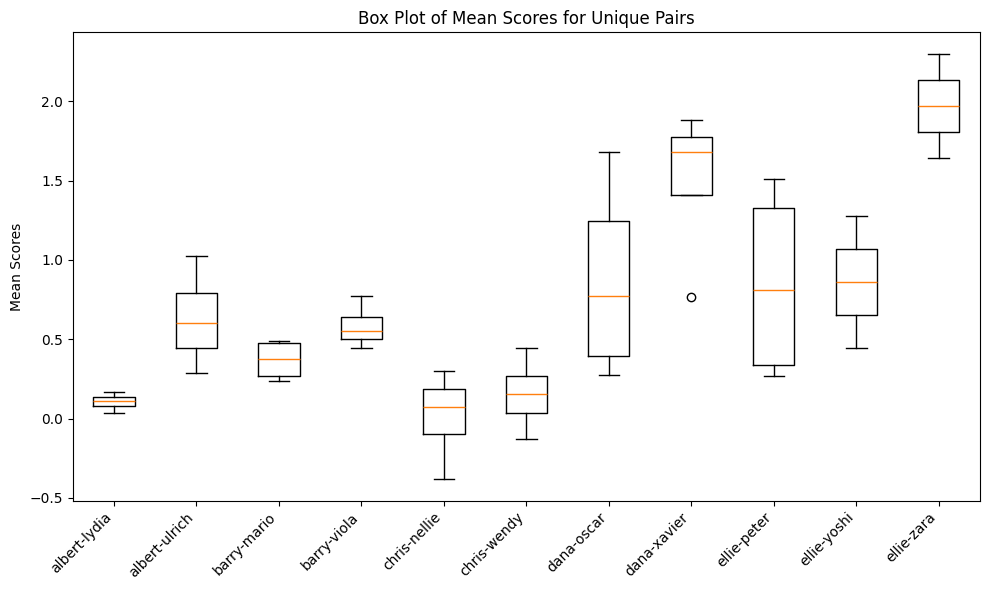

In [4]:
#!/usr/bin/env python3
import numpy as np
import glob
import matplotlib.pyplot as plt

data_directory = "./vis_project_data/"

# Default weights; used if not set
default_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

# Types of sessions/files:
session_types = ["cog", "so"]
whatdoors = ["indoor"]
whichs = ["base", "inter"]

# Combine to single itteratable list
combined_scenarios = [
    (ses_type, whatdoor, which)
    for ses_type in session_types
    for whatdoor in whatdoors
    for which in whichs
]

################################################################################


def combined_score(filename, weights):
    """Calculates the 'score' for a single session/file.
    Assumes total session duration is 360s, otherwise returns 'nan'.
    This could be modified simply to also return other details of the session."""
    with open(filename, "r") as file:
        score = 0.0
        total_duration = 0.0
        t_end_prev = 0.0
        for count, line in enumerate(file.readlines()):
            # print(count, line)
            data = line.split(",", 4)
            if count == 0:
                continue
            if line[0] == "*":
                break

            t_catagory = int(data[0])
            t_beg = int(data[1])
            t_end = int(data[2])

            if t_beg != t_end_prev:
                print("Error, missing time stamp?")
            t_end_prev = t_end

            assert t_end >= t_beg
            if count == 1:
                assert t_beg == 0

            duration = float(t_end - t_beg)
            total_duration += duration
            score += weights[t_catagory - 1] * duration
        return score / total_duration
        return score if np.abs(total_duration - 1.0) < 1.0e-5 else np.nan


################################################################################


def print_scores(
    ca, peer, cognitive_weights=default_weights, social_weights=default_weights
):
    """Calculates the scores for given ca/peer pair.
    It simply prints the result to screen - to be useful, you will want
    to actually store this data (e.g., return a struct or array etc.).
    """
    trained = "Trained" if "u" <= peer[0] <= "z" else "Untrained"
    print(ca, peer, f"({trained})")
    scores_list = []
    for ses_type, whatdoor, which in combined_scenarios:

        weights = cognitive_weights if ses_type == "cog" else social_weights

        # glob creates the list of filenames that match the given pattern
        # '*' is a wildcard
        files = glob.glob(
            data_directory + f"{ses_type}-*-{which}-*-{ca}-{peer}-{whatdoor}.dtx"
        )

        if len(files) == 0:
            continue

        scores = []
        for file in files:
            tmp_score = combined_score(file, weights)
            if not np.isnan(tmp_score):
                scores.append(tmp_score)
        scores = np.array(scores)

        mean = scores.mean()
        scores_list.append(mean)
        sdev = scores.std(ddof=1)  # "corrected" sdev
        sem = sdev / np.sqrt(len(scores))
        # Equiv. to:
        # sdev = scores.std()
        # sem = sdev / np.sqrt(len(scores) - 1)

        # len(scores) is the total number of kept (complete) sessions [for this ca/peer]
        # len(files) is the total number of sessions (files) in data directory
        print(
            f"{ses_type:3} {whatdoor:7} {which:5}: {mean:6.3f} +/- {sem:.3f}  [{len(scores)}/{len(files)}]"
        )
    return scores_list


################################################################################


def unique_pairs():
    """Returns list of unique ca/peer pairs"""
    all_files = glob.glob(data_directory + "/*.dtx")
    list = []
    for file in all_files:
        t = file.split("-")
        list.append([t[4], t[5]])

    return np.unique(list, axis=0)


################################################################################

if __name__ == "__main__":

    # Example usage:

    ca_peer_list = unique_pairs()
    print(ca_peer_list)

    print()

    # From the thesis:
    soc_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

    # Match table 5.1 of thesis
    # cog_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

    # Match matlab example:
    cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])

    mean_scores = []
    labels = []
    for ca, peer in ca_peer_list:
        print()
        scores = print_scores(ca, peer, cog_weights, soc_weights)
        mean_scores.append(scores)
        labels.append(f"{ca}-{peer}")

    # Plotting box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(mean_scores, labels=labels)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Mean Scores")
    plt.title("Box Plot of Mean Scores for Unique Pairs")
    plt.tight_layout()
    plt.show()


[['albert' 'lydia']
 ['albert' 'ulrich']
 ['barry' 'mario']
 ['barry' 'viola']
 ['chris' 'nellie']
 ['chris' 'wendy']
 ['dana' 'oscar']
 ['dana' 'xavier']
 ['ellie' 'peter']
 ['ellie' 'yoshi']
 ['ellie' 'zara']]


albert lydia (Untrained)
cog indoor  base :  0.033 +/- 0.027  [4/4]
cog indoor  inter:  0.168 +/- 0.084  [13/13]
cog outdoor base :  0.245 +/- 0.110  [4/4]
cog outdoor inter:  0.347 +/- 0.101  [10/10]
so  indoor  base :  0.097 +/- 0.043  [4/4]
so  indoor  inter:  0.129 +/- 0.034  [13/13]
so  outdoor base :  0.101 +/- 0.089  [4/4]
so  outdoor inter:  0.055 +/- 0.016  [10/10]


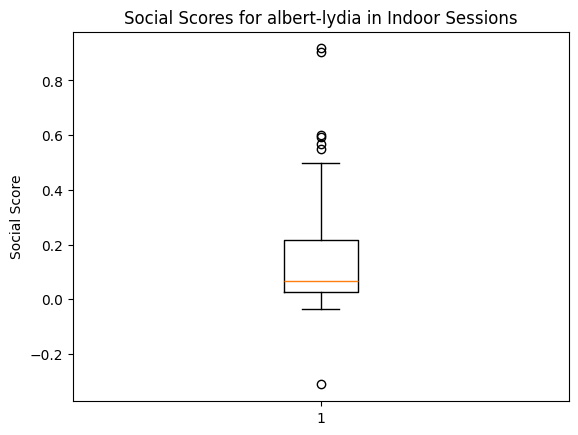


albert ulrich (Trained)
cog indoor  base :  0.286 +/- 0.102  [5/5]
cog indoor  inter:  0.709 +/- 0.079  [10/10]
cog outdoor base :  0.382 +/- 0.200  [6/6]
cog outdoor inter:  0.822 +/- 0.099  [7/7]
so  indoor  base :  0.496 +/- 0.208  [5/5]
so  indoor  inter:  1.026 +/- 0.099  [10/10]
so  outdoor base :  0.132 +/- 0.060  [6/6]
so  outdoor inter:  1.069 +/- 0.181  [7/7]


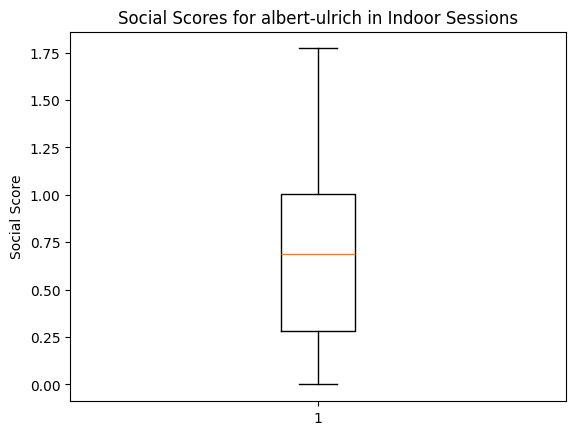


barry mario (Untrained)
cog indoor  base :  0.490 +/- 0.069  [4/4]
cog indoor  inter:  0.470 +/- 0.107  [12/12]
cog outdoor base :  0.443 +/- 0.093  [4/4]
cog outdoor inter:  1.033 +/- 0.228  [10/10]
so  indoor  base :  0.281 +/- 0.070  [4/4]
so  indoor  inter:  0.237 +/- 0.064  [12/12]
so  outdoor base :  0.231 +/- 0.107  [4/4]
so  outdoor inter:  0.186 +/- 0.050  [10/10]


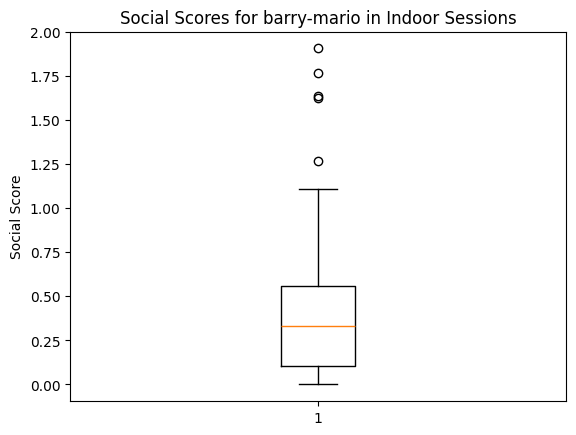


barry viola (Trained)
cog indoor  base :  0.591 +/- 0.134  [4/4]
cog indoor  inter:  0.775 +/- 0.128  [12/12]
cog outdoor base :  0.486 +/- 0.181  [4/4]
cog outdoor inter:  0.953 +/- 0.205  [12/12]
so  indoor  base :  0.444 +/- 0.049  [4/4]
so  indoor  inter:  0.517 +/- 0.101  [12/12]
so  outdoor base :  0.199 +/- 0.071  [4/4]
so  outdoor inter:  0.428 +/- 0.083  [12/12]


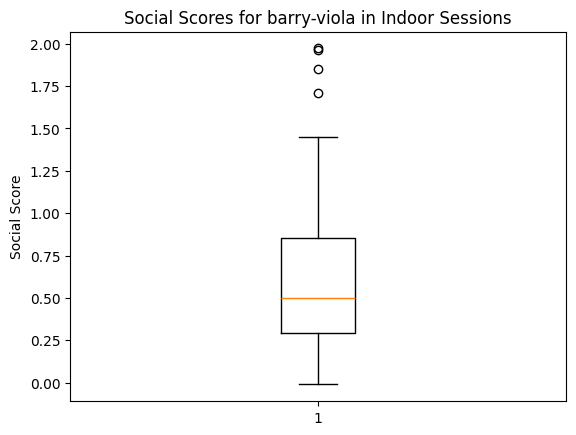


chris nellie (Untrained)
cog indoor  base : -0.001 +/- 0.162  [4/4]
cog indoor  inter: -0.382 +/- 0.056  [6/6]
cog outdoor base : -0.003 +/- 0.043  [6/6]
cog outdoor inter:  0.251 +/- 0.325  [4/4]
so  indoor  base :  0.303 +/- 0.069  [4/4]
so  indoor  inter:  0.150 +/- 0.043  [6/6]
so  outdoor base :  0.021 +/- 0.012  [6/6]
so  outdoor inter:  0.022 +/- 0.004  [4/4]


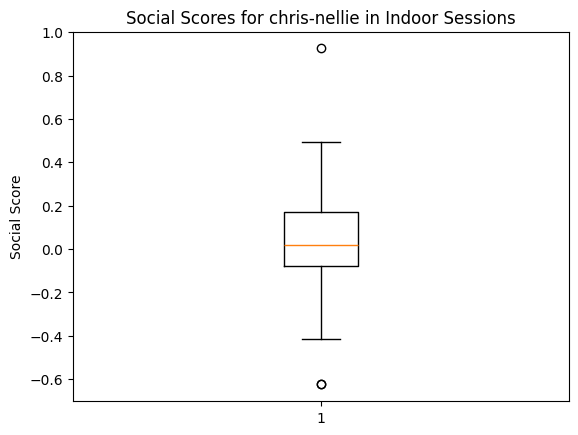


chris wendy (Trained)
cog indoor  base : -0.131 +/- 0.114  [4/4]
cog indoor  inter:  0.094 +/- 0.072  [12/12]
cog outdoor base : -0.063 +/- 0.035  [4/4]
cog outdoor inter:  0.376 +/- 0.154  [10/10]
so  indoor  base :  0.211 +/- 0.056  [4/4]
so  indoor  inter:  0.448 +/- 0.060  [12/12]
so  outdoor base :  0.022 +/- 0.009  [4/4]
so  outdoor inter:  0.507 +/- 0.146  [10/10]


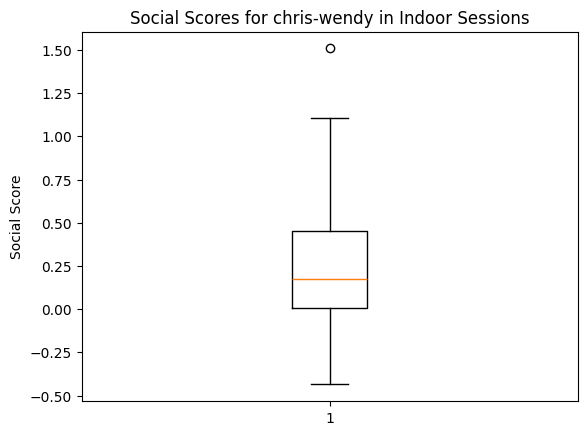


dana oscar (Untrained)
cog indoor  base :  1.680 +/- 0.114  [7/7]
cog indoor  inter:  1.103 +/- 0.118  [14/14]
cog outdoor base :  1.178 +/- 0.113  [6/6]
cog outdoor inter:  1.439 +/- 0.096  [13/13]
so  indoor  base :  0.275 +/- 0.081  [7/7]
so  indoor  inter:  0.437 +/- 0.070  [14/14]
so  outdoor base :  0.176 +/- 0.032  [6/6]
so  outdoor inter:  0.138 +/- 0.033  [13/13]


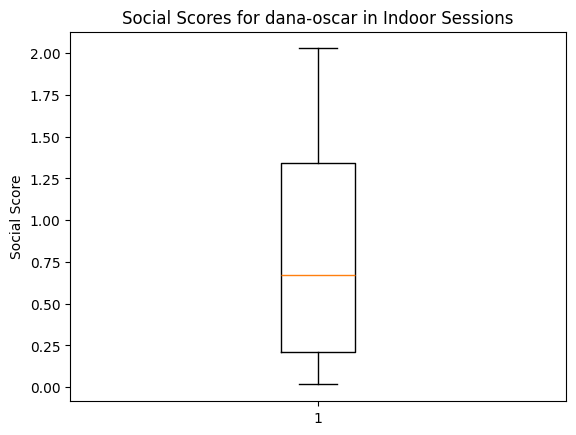


dana xavier (Trained)
cog indoor  base :  1.735 +/- 0.139  [7/7]
cog indoor  inter:  1.881 +/- 0.159  [12/12]
cog outdoor base :  1.275 +/- 0.089  [6/6]
cog outdoor inter:  1.563 +/- 0.070  [11/11]
so  indoor  base :  0.766 +/- 0.252  [7/7]
so  indoor  inter:  1.619 +/- 0.289  [12/12]
so  outdoor base :  0.431 +/- 0.126  [6/6]
so  outdoor inter:  0.872 +/- 0.145  [11/11]


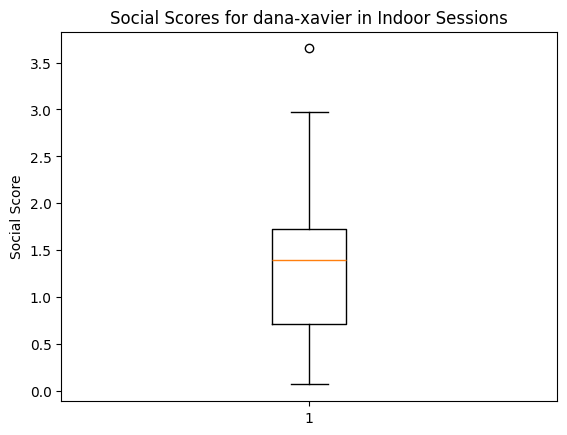


ellie peter (Untrained)
cog indoor  base :  1.266 +/- 0.090  [10/10]
cog indoor  inter:  1.512 +/- 0.094  [14/14]
cog outdoor base :  1.257 +/- 0.147  [8/8]
cog outdoor inter:  1.337 +/- 0.120  [14/14]
so  indoor  base :  0.358 +/- 0.070  [10/10]
so  indoor  inter:  0.268 +/- 0.054  [14/14]
so  outdoor base :  0.351 +/- 0.091  [8/8]
so  outdoor inter:  0.387 +/- 0.053  [14/14]


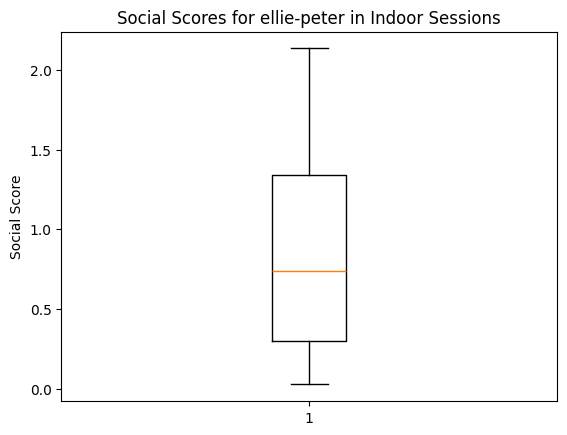


ellie yoshi (Trained)
cog indoor  base :  1.278 +/- 0.091  [10/10]
cog outdoor base :  1.379 +/- 0.086  [8/8]
so  indoor  base :  0.443 +/- 0.078  [10/10]
so  outdoor base :  0.381 +/- 0.056  [8/8]


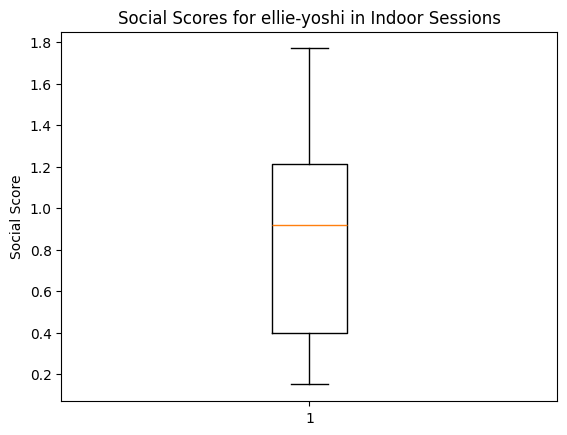


ellie zara (Trained)
cog indoor  inter:  2.299 +/- 0.120  [15/15]
cog outdoor inter:  1.567 +/- 0.043  [15/15]
so  indoor  inter:  1.644 +/- 0.137  [15/15]
so  outdoor inter:  0.969 +/- 0.094  [15/15]


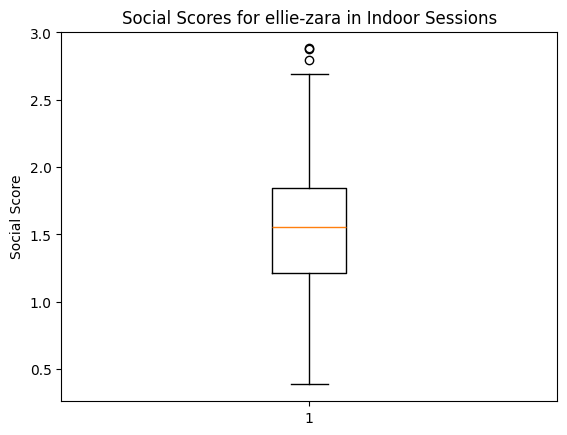

In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt  # Import matplotlib for plotting

data_directory = "./vis_project_data/"

# Default weights; used if not set
default_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

# Types of sessions/files:
session_types = ["cog", "so"]
whatdoors = ["indoor", "outdoor"]
whichs = ["base", "inter"]

# Combine to single iterable list
combined_scenarios = [
    (ses_type, whatdoor, which)
    for ses_type in session_types
    for whatdoor in whatdoors
    for which in whichs
]

################################################################################


def combined_score(filename, weights):
    """Calculates the 'score' for a single session/file.
    Assumes total session duration is 360s, otherwise returns 'nan'.
    This could be modified simply to also return other details of the session."""
    with open(filename, "r") as file:
        score = 0.0
        total_duration = 0.0
        t_end_prev = 0.0
        for count, line in enumerate(file.readlines()):
            # print(count, line)
            data = line.split(",", 4)
            if count == 0:
                continue
            if line[0] == "*":
                break

            t_catagory = int(data[0])
            t_beg = int(data[1])
            t_end = int(data[2])

            if t_beg != t_end_prev:
                print("Error, missing time stamp?")
            t_end_prev = t_end

            assert t_end >= t_beg
            if count == 1:
                assert t_beg == 0

            duration = float(t_end - t_beg)
            total_duration += duration
            score += weights[t_catagory - 1] * duration
        return score / total_duration
        return score if np.abs(total_duration - 1.0) < 1.0e-5 else np.nan


################################################################################


def print_scores(
    ca, peer, cognitive_weights=default_weights, social_weights=default_weights
):
    """Calculates the scores for given ca/peer pair.
    It simply prints the result to screen - to be useful, you will want
    to actually store this data (e.g., return a struct or array etc.).
    """
    trained = "Trained" if "u" <= peer[0] <= "z" else "Untrained"
    print(ca, peer, f"({trained})")
    scores_all = []  # List to store all scores for box plot
    for ses_type, whatdoor, which in combined_scenarios:

        weights = cognitive_weights if ses_type == "cog" else social_weights

        # glob creates the list of filenames that match the given pattern
        # '*' is a wildcard
        files = glob.glob(
            data_directory + f"{ses_type}-*-{which}-*-{ca}-{peer}-{whatdoor}.dtx"
        )

        if len(files) == 0:
            continue

        scores = []
        for file in files:
            tmp_score = combined_score(file, weights)
            if not np.isnan(tmp_score):
                scores.append(tmp_score)
                scores_all.append(tmp_score)  # Add score to overall list
        scores = np.array(scores)

        mean = scores.mean()
        sdev = scores.std(ddof=1)  # "corrected" sdev
        sem = sdev / np.sqrt(len(scores))
        # Equiv. to:
        # sdev = scores.std()
        # sem = sdev / np.sqrt(len(scores) - 1)

        # len(scores) is the total number of kept (complete) sessions [for this ca/peer]
        # len(files) is the total number of sessions (files) in data directory
        print(
            f"{ses_type:3} {whatdoor:7} {which:5}: {mean:6.3f} +/- {sem:.3f}  [{len(scores)}/{len(files)}]"
        )

    # Plot box plot for all scores of the dyad
    plt.boxplot(scores_all)
    plt.title(f"Social Scores for {ca}-{peer} in Indoor Sessions")
    plt.ylabel("Social Score")
    plt.show()


################################################################################


def unique_pairs():
    """Returns list of unique ca/peer pairs"""
    all_files = glob.glob(data_directory + "/*.dtx")
    list = []
    for file in all_files:
        t = file.split("-")
        list.append([t[4], t[5]])

    return np.unique(list, axis=0)


################################################################################

if __name__ == "__main__":

    # Example usage:

    ca_peer_list = unique_pairs()
    print(ca_peer_list)

    print()

    # From the thesis:
    soc_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

    # Match table 5.1 of thesis
    # cog_weights = np.array([-1, 0, 1, 2, 2, 3, 5])

    # Match matlab example:
    cog_weights = np.array([0, -1, 1, 2, 2, 3, 5])

    # # Example:
    # ca = "albert"
    # peer = "lydia"
    # print_scores("albert", "lydia", cog_weights, soc_weights)

    # Or, for all pairs:
    for ca, peer in ca_peer_list:
        print()
        print_scores(ca, peer, cog_weights, soc_weights)

